In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #for our Label encoding
%matplotlib inline

In [3]:
df= pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [4]:
df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

### X-y split (y is the target variable, in this case, "total claim amount")

In [5]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [6]:
numerical_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [7]:
X=numerical_df[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y=numerical_df['total_claim_amount']

### Train - Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

### Scaler fit

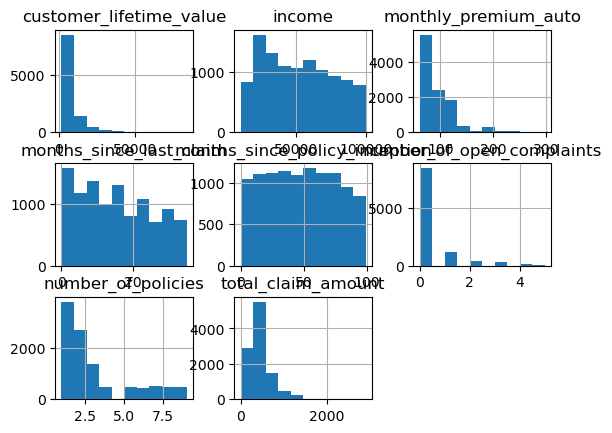

In [10]:
numerical_df.hist()
plt.show()

### this is the reason we will use power transform

In [11]:
from sklearn.preprocessing import PowerTransformer

In [12]:
scaler = PowerTransformer()

In [13]:
scaler_fit= scaler.fit(X_train)

In [14]:
scaler_transform_train= scaler.transform(X_train)

In [15]:
scaler_transform_train

array([[ 0.58927976, -0.27133573, -0.01109329, ...,  1.3828796 ,
         1.92011877, -0.07337992],
       [-0.5690877 , -1.91397809,  0.87142009, ..., -0.4145329 ,
        -0.50854357, -1.15037078],
       [-1.73453765, -1.39164017, -1.34502037, ...,  1.55291108,
        -0.50854357, -1.15037078],
       ...,
       [-0.55707757, -1.39346765, -1.25353688, ..., -1.54719252,
         2.02730718,  1.57137021],
       [ 1.11960931,  1.01324535,  0.796397  , ...,  1.3828796 ,
        -0.50854357, -0.07337992],
       [ 0.26467243,  0.55177925,  0.62947534, ...,  0.28394489,
        -0.50854357,  1.4559005 ]])

In [16]:
scaler_transform_test= scaler.transform(X_test)

In [17]:
scaler_transform_test

array([[-0.31215401,  0.86864715, -1.53910081, ...,  1.03302617,
        -0.50854357,  1.12366771],
       [ 0.6784699 , -0.25291401,  1.00710476, ...,  1.03302617,
        -0.50854357,  0.50467235],
       [-1.09090059,  0.72446865, -0.15969552, ..., -0.01962906,
        -0.50854357, -1.15037078],
       ...,
       [-1.47449237, -1.305799  , -0.70034243, ...,  0.34945344,
        -0.50854357, -1.15037078],
       [-0.38393928, -0.5532284 ,  1.06860257, ...,  0.15088597,
         1.92011877, -1.15037078],
       [ 1.7318894 ,  1.68791193, -0.77109334, ..., -0.68403433,
        -0.50854357, -0.07337992]])

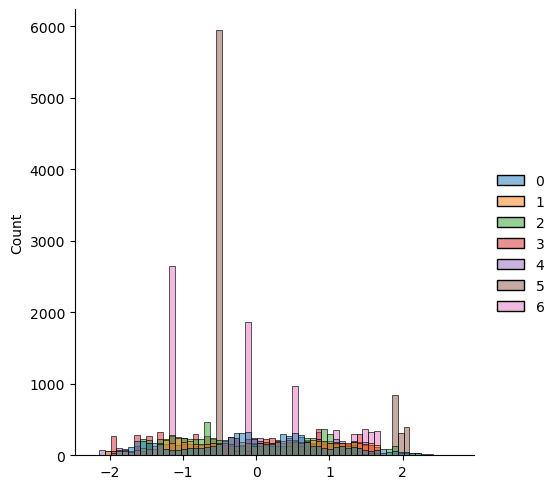

In [18]:
sns.displot(scaler_transform_train)

### Model Generation

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
#X_train = np.array(X_train).reshape(-1,1)
#y_train = np.array(y_train).reshape(-1,1)

In [21]:
lm = LinearRegression()

In [22]:
model = lm.fit(scaler_transform_train, y_train)

In [23]:
model.coef_

array([ -2.13594719, -36.7201968 , 161.12276203,   3.5527067 ,
        -2.03301237,  -1.17714444,   1.58807445])

In [24]:
model.intercept_

433.3067361668137

### TEST

In [25]:
len(y_test)

3207

In [26]:
y_pred

NameError: name 'y_pred' is not defined

In [40]:
y_pred = model.predict(scaler_transform_test)

In [41]:
y_test.shape

(3207, 1)

In [42]:
len(X_test)

3207

In [43]:
compare =pd.DataFrame({"y_test": list(y_test), "y_pred": list(y_pred)})

In [44]:
compare

,y_test,y_pred
0,[120],147.462929
1,[660],601.475384
2,[244],375.202862
3,[86],219.506225
4,[1032],751.702461
...,...,...
3202,[406],595.725718
3203,[321],262.147115
3204,[45],373.307824
3205,[597],618.267446


In [45]:
y_test= np.array(y_test).reshape(-1,1)

In [46]:
y_pred= np.array(y_pred).reshape(-1,1)

In [47]:
compare_y= y_test - y_pred

In [48]:
compare_y

array([[ -27.46292859],
       [  58.52461631],
       [-131.20286223],
       ...,
       [-328.30782407],
       [ -21.26744589],
       [-199.87746792]])

### Model Evaluation

In [49]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [50]:
mse(y_test,y_pred)

57867.923045991636

In [51]:
mae(y_test, y_pred)

168.3317120432042

In [52]:
import matplotlib.pyplot as plt

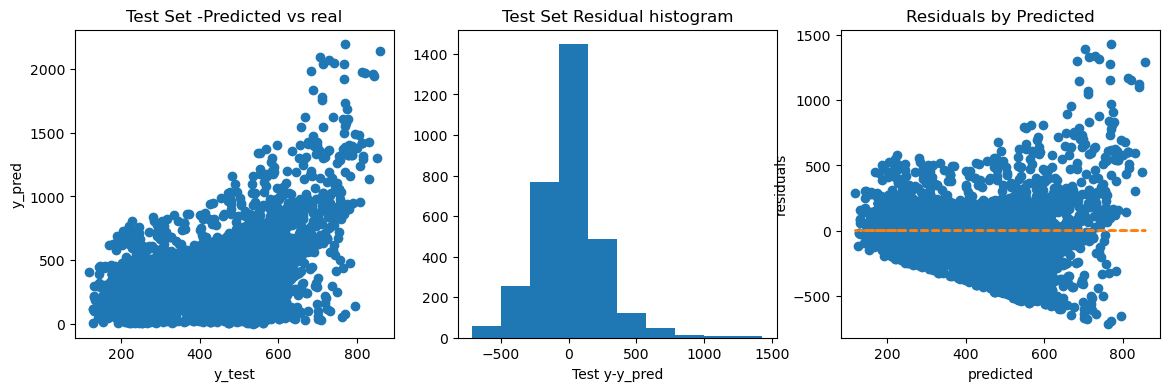

In [53]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')